In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load datasets from sklearn dataset Diabetes 
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [13]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [15]:
df = pd.DataFrame(dataset.data, columns = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [16]:
X = df
y = dataset['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state=42)

In [22]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

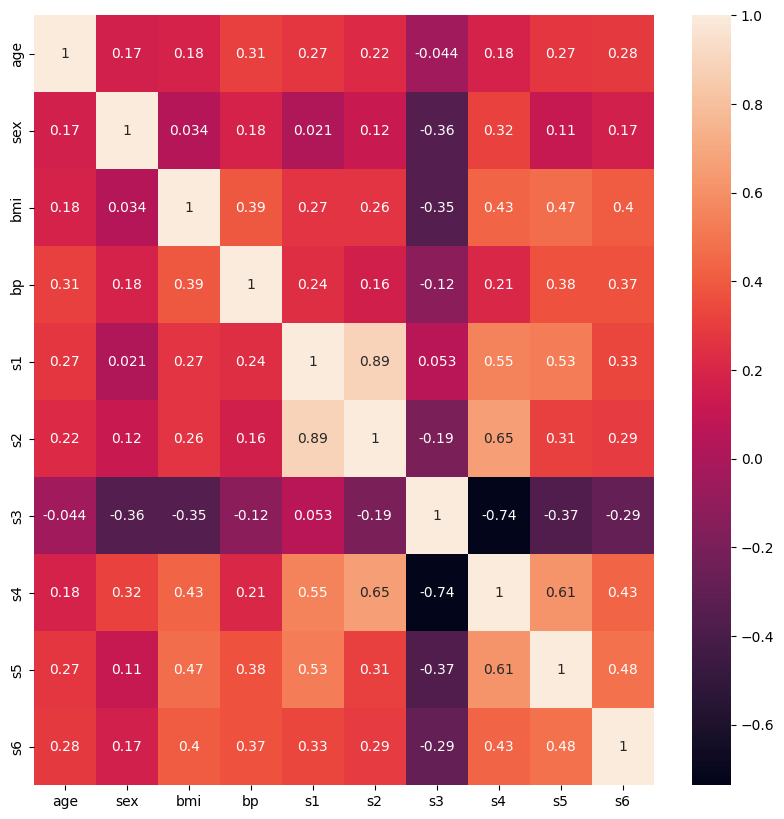

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot = True)

In [25]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor()
regression.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25,30],
    'max_features':['auto','sqrt','log2']
}

In [30]:
params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt', 'log2']}

In [31]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(regression,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [32]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [34]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [35]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [36]:
y_pred = grid.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('r2_score :',r2_score(y_test, y_pred))
print('mean_squared_error :',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))

r2_score : 0.25826553646717965
mean_squared_error : 3929.8217449014355
Mean Absolute Error : 51.45198329744875


In [38]:
selectmodel = DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='sqrt',splitter='best')

In [39]:
selectmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='sqrt')

[Text(0.5, 0.875, 'x[2] <= 0.005\npoisson = 20.018\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.625, 'x[6] <= -0.034\npoisson = 14.627\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= -0.038\npoisson = 13.866\nsamples = 35\nvalue = 166.057'),
 Text(0.0625, 0.125, 'poisson = 4.353\nsamples = 9\nvalue = 111.778'),
 Text(0.1875, 0.125, 'poisson = 12.661\nsamples = 26\nvalue = 184.846'),
 Text(0.375, 0.375, 'x[2] <= -0.053\npoisson = 12.632\nsamples = 174\nvalue = 108.385'),
 Text(0.3125, 0.125, 'poisson = 7.183\nsamples = 38\nvalue = 88.474'),
 Text(0.4375, 0.125, 'poisson = 13.468\nsamples = 136\nvalue = 113.949'),
 Text(0.75, 0.625, 'x[9] <= 0.034\npoisson = 13.413\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= -0.06\npoisson = 13.256\nsamples = 94\nvalue = 185.617'),
 Text(0.5625, 0.125, 'poisson = 7.683\nsamples = 10\nvalue = 234.5'),
 Text(0.6875, 0.125, 'poisson = 13.121\nsamples = 84\nv

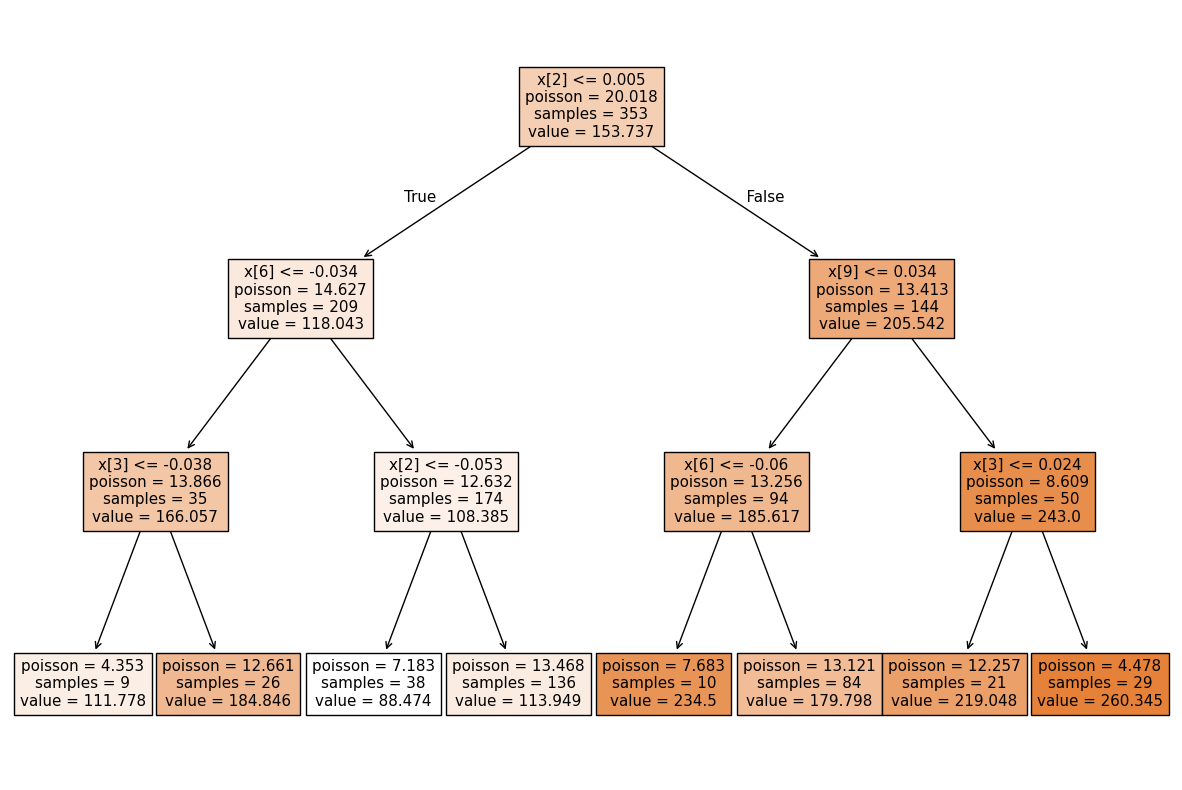

In [41]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled = True)